<a href="https://colab.research.google.com/github/swarajksahoo/Python-DataBase-Connectivity/blob/main/Tensorflow_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)

In [139]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [138]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [88]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [ ]:
celsius_q = np.array([-40, -10, 0, 8.0, 15.0, 22.0, 38.0], dtype=float)
fahrenheit_a = np.array([-40, -14, 32, 46.4, 59, 71.6, 100.4], dtype=float)

In [ ]:
l0 = tf.keras.layers.Dense(units = 1, input_shape = [1])
l1 = tf.keras.layers.Dense(units = 4)
l2 = tf.keras.layers.Dense(units = 1)

In [ ]:
model = tf.keras.Sequential([l0])

In [ ]:
model.compile(loss = 'mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

In [ ]:
history = model.fit(celsius_q, fahrenheit_a, epochs=700, verbose=False)

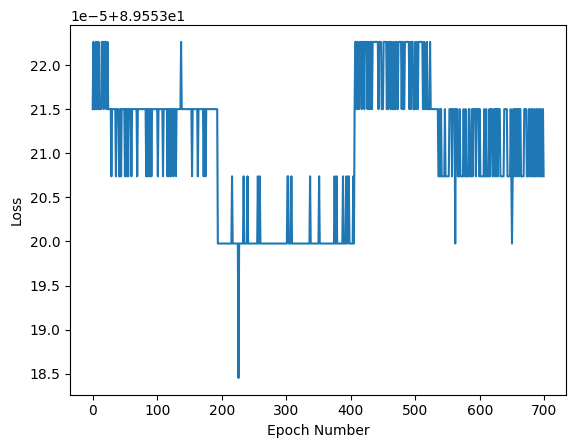

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(history.history['loss'])

In [ ]:
print(model.predict([100.0]))

1/1 [==============================] - 0s 42ms/step
[[218.43692]]


In [ ]:
l0.get_weights()

[array([[1.909533]], dtype=float32), array([27.483608], dtype=float32)]

In [115]:
df = pd.read_csv("/content/sample_data/HR Data.csv")

In [116]:
df.head()

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,Marital Status,Over Time,Over18,Training Times Last Year,Age,CF_current Employee,Daily Rate,Distance From Home,Education,Employee Count,Environment Satisfaction,Hourly Rate,Job Involvement,Job Level,Job Satisfaction,Monthly Income,Monthly Rate,Num Companies Worked,Percent Salary Hike,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,Single,Yes,Y,0,41,0,1102,1,Associates Degree,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,1,6,4,0,5
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,Married,No,Y,3,49,1,279,8,High School,1,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,10,7,1,7
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,Single,Yes,Y,3,37,0,1373,2,Associates Degree,1,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,0,0,0,0
3,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,Married,Yes,Y,3,33,1,1392,3,Master's Degree,1,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,8,7,3,0
4,No,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,Married,No,Y,3,27,1,591,2,High School,1,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,2,2,2,2


In [6]:
#from ydata_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df,title="HCC Profile Report")

In [ ]:
profile.to_file("/content/sample_data/report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
df.isnull().sum();

In [95]:
df.columns;

In [117]:
df = df.drop(['emp no', 'Employee Number', 'CF_current Employee', 'Employee Count', 'CF_attrition label'], axis=1)

In [94]:
df.dtypes;

In [118]:
X = df.drop(['Attrition'], axis=1)
y = pd.DataFrame(df.Attrition)
y.columns= ['Label']
y.Label = np.where(y.Label=='Yes',1,0)
col_numeric = X.select_dtypes(include=['int64']).columns.tolist()
col_categorical = X.select_dtypes(include=['object']).columns.tolist()

pandas.core.series.Series

In [28]:
df[col_categorical].head()

,Business Travel,CF_age band,CF_attrition label,Department,Education Field,Gender,Job Role,Marital Status,Over Time,Over18,Education
0,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,Female,Sales Executive,Single,Yes,Y,Associates Degree
1,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,Male,Research Scientist,Married,No,Y,High School
2,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,Male,Laboratory Technician,Single,Yes,Y,Associates Degree
3,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,Female,Research Scientist,Married,Yes,Y,Master's Degree
4,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,Male,Laboratory Technician,Married,No,Y,High School


In [119]:
one_hot_encoded_data = pd.get_dummies(X, columns=col_categorical, dtype=int)

In [51]:
one_hot_encoded_data.head()

,Training Times Last Year,Age,CF_current Employee,Daily Rate,Distance From Home,Employee Count,Environment Satisfaction,Hourly Rate,Job Involvement,Job Level,Job Satisfaction,Monthly Income,Monthly Rate,Num Companies Worked,Percent Salary Hike,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Business Travel_Non-Travel,Business Travel_Travel_Frequently,Business Travel_Travel_Rarely,CF_age band_25 - 34,CF_age band_35 - 44,CF_age band_45 - 54,CF_age band_Over 55,CF_age band_Under 25,CF_attrition label_Current Employees,CF_attrition label_Ex-Employees,Department_HR,Department_R&D,Department_Sales,Education Field_Human Resources,Education Field_Life Sciences,Education Field_Marketing,Education Field_Medical,Education Field_Other,Education Field_Technical Degree,Gender_Female,Gender_Male,Job Role_Healthcare Representative,Job Role_Human Resources,Job Role_Laboratory Technician,Job Role_Manager,Job Role_Manufacturing Director,Job Role_Research Director,Job Role_Research Scientist,Job Role_Sales Executive,Job Role_Sales Representative,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Over Time_No,Over Time_Yes,Over18_Y,Education_Associates Degree,Education_Bachelor's Degree,Education_Doctoral Degree,Education_High School,Education_Master's Degree
0,0,41,0,1102,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,1,6,4,0,5,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0,0,0
1,3,49,1,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,10,7,1,7,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
2,3,37,0,1373,2,1,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0
3,3,33,1,1392,3,1,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,8,7,3,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1
4,3,27,1,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,2,2,2,2,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0


In [120]:
X_train, X_test, y_train, y_test = train_test_split(one_hot_encoded_data, y, test_size=0.20, random_state=42)

In [79]:
X_train.head()

,Training Times Last Year,Age,CF_current Employee,Daily Rate,Distance From Home,Employee Count,Environment Satisfaction,Hourly Rate,Job Involvement,Job Level,Job Satisfaction,Monthly Income,Monthly Rate,Num Companies Worked,Percent Salary Hike,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Business Travel_Non-Travel,Business Travel_Travel_Frequently,Business Travel_Travel_Rarely,CF_age band_25 - 34,CF_age band_35 - 44,CF_age band_45 - 54,CF_age band_Over 55,CF_age band_Under 25,CF_attrition label_Current Employees,CF_attrition label_Ex-Employees,Department_HR,Department_R&D,Department_Sales,Education Field_Human Resources,Education Field_Life Sciences,Education Field_Marketing,Education Field_Medical,Education Field_Other,Education Field_Technical Degree,Gender_Female,Gender_Male,Job Role_Healthcare Representative,Job Role_Human Resources,Job Role_Laboratory Technician,Job Role_Manager,Job Role_Manufacturing Director,Job Role_Research Director,Job Role_Research Scientist,Job Role_Sales Executive,Job Role_Sales Representative,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Over Time_No,Over Time_Yes,Over18_Y,Education_Associates Degree,Education_Bachelor's Degree,Education_Doctoral Degree,Education_High School,Education_Master's Degree
1097,6,35,1,1180,2,1,2,90,3,2,4,5762,24442,2,14,3,3,80,1,15,3,7,7,1,7,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0
727,2,18,1,287,5,1,2,73,3,1,4,1051,13493,1,15,3,4,80,0,0,3,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0
254,2,29,1,1247,20,1,4,45,3,2,4,6931,10732,2,14,3,4,80,1,10,3,3,2,0,2,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0,0,0,0
1175,2,25,1,949,1,1,1,81,3,1,4,3229,4910,4,11,3,2,80,1,7,2,3,2,0,2,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0
1341,2,54,1,1050,11,1,2,87,3,4,4,16032,24456,3,20,4,1,80,1,26,3,14,9,1,12,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1


In [121]:
scaler = StandardScaler()
#scaler = MinMaxScaler()
scaled_data_train = pd.DataFrame(scaler.fit_transform(X_train))
scaled_data_train.columns = one_hot_encoded_data.columns

In [122]:
scaler = StandardScaler()
#scaler = MinMaxScaler()
scaled_data_test = pd.DataFrame(scaler.fit_transform(X_test))
scaled_data_test.columns = one_hot_encoded_data.columns

In [132]:
scaled_data_train.shape

(1176, 62)

In [129]:
scaled_data_test.shape

(294, 62)

In [133]:
model = Sequential()

In [134]:
model.add(Dense(12, input_dim=62, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [135]:
dl = model.fit(scaled_data_train, y_train, epochs=100, verbose=True)

Epoch 1/100
37/37 [==============================] - 1s 2ms/step - loss: 0.4869 - accuracy: 0.8333
Epoch 2/100
37/37 [==============================] - 0s 2ms/step - loss: 0.4539 - accuracy: 0.8333
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 0.4300 - accuracy: 0.8333
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 0.4116 - accuracy: 0.8333
Epoch 5/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3945 - accuracy: 0.8333
Epoch 6/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3788 - accuracy: 0.8333
Epoch 7/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3650 - accuracy: 0.8333
Epoch 8/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3531 - accuracy: 0.8333
Epoch 9/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3421 - accuracy: 0.8333
Epoch 10/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3325 - accuracy: 0.8333
Epoch 11/

In [137]:
_, train_accuracy = model.evaluate(scaled_data_train, y_train)
print('Train Accuracy :  %.2f' % (train_accuracy*100))

_, test_accuracy = model.evaluate(scaled_data_test, y_test)
print('Test Accuracy :  %.2f' % (test_accuracy*100))


37/37 [==============================] - 0s 2ms/step - loss: 0.0356 - accuracy: 0.9940
Train Accuracy :  99.40
10/10 [==============================] - 0s 2ms/step - loss: 0.6655 - accuracy: 0.8435
Test Accuracy :  84.35


37/37 [==============================] - 0s 2ms/step


Text(0.5, 1.05, 'Confusion_matrix')

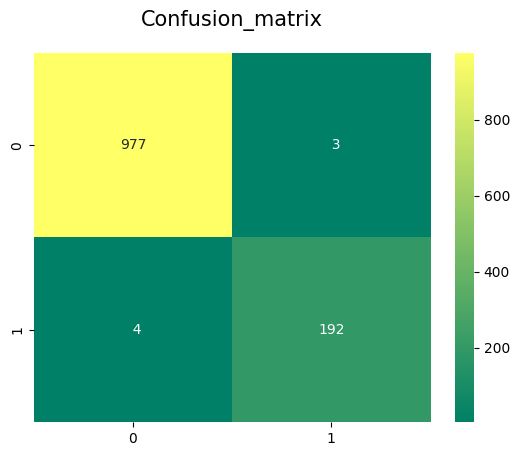

In [140]:
prediction = model.predict(scaled_data_train)
prediction = np.where(prediction>0.5,1,0)

sns.heatmap(confusion_matrix(y_train,prediction),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)